## Homework 6
Hi everyone this is your sixth homework.

In this exercise, You will deal with **Unsupervised Learning**.

You are free to discuss the problems and ways to approach them with your classmates, but be sure to not cheat. **Cheating will not be tolerated**.

##<font color="red">**Question 1**</font>
In this problem, you will generate simulated data, and then perform
PCA and K-means clustering on the data.

- Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

To generate stimulated data, we use **make_blobs** in here:

In [26]:
import numpy as np
np.random.seed(0)
# Your code:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=60, centers=3, n_features=50, random_state=0)

In [27]:
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (60, 50)
y shape:  (60,)


- Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

According to the following plot, PCA has transformed data in a way that now all of 3 classes are separated completely:

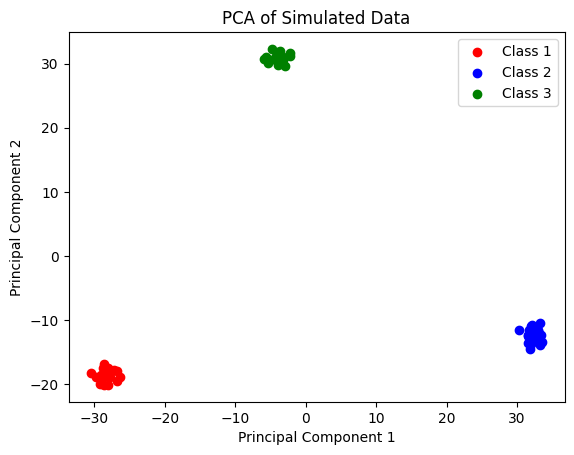

In [28]:
# Your code:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(X)

# Plot the first two principal components
plt.scatter(principal_components[y == 0, 0], principal_components[y == 0, 1], color='red', label='Class 1')
plt.scatter(principal_components[y == 1, 0], principal_components[y == 1, 1], color='blue', label='Class 2')
plt.scatter(principal_components[y == 2, 0], principal_components[y == 2, 1], color='green', label='Class 3')

# Add labels and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Simulated Data')
plt.legend()
plt.show()

- Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?

In this scenario, we specified number of clusters same as the real number of class labels. If kmeans operrates successfully in this scenario, we expect that each class label has a special cluster for itself and we won't have instances in wrong clusters.
Based on the results, everything is right as our expectation! We have %100 accuracy and no mislabeled example:

Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


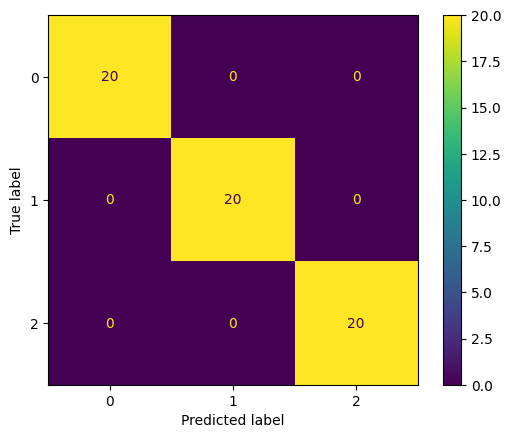

In [29]:
# Your code:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=41)
predicted_labels = kmeans.fit_predict(X)

# Compare K-means clusters to true class labels
accuracy = accuracy_score(y, predicted_labels)

print("Accuracy:", accuracy)
ConfusionMatrixDisplay.from_predictions(y, predicted_labels)

- Perform K-means clustering with K = 2. Describe your results.

Now the number of clusters is less than number of class labels so inevitably, we will have some misclassified examples. According to the confusion matrix, class "1" has a specific class for itself but classes "0" and "2" are on a same cluster. Maybe it's because that points from these two classes have shorter distances:

Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


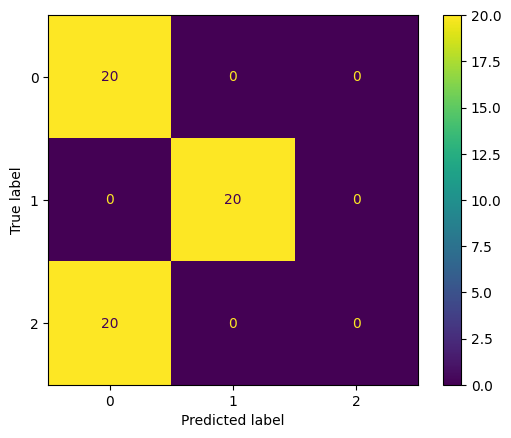

In [30]:
# Your code:
# Perform K-means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=41)
predicted_labels = kmeans.fit_predict(X)

# Compare K-means clusters to true class labels
accuracy = accuracy_score(y, predicted_labels)

print("Accuracy:", accuracy)
ConfusionMatrixDisplay.from_predictions(y, predicted_labels)

- Now perform K-means clustering with K = 4, and describe your results.

class "1" and class "2" have their special clusters in this case but class "0" has devided to 2 clusters. It could happen becuase the points in this class are sparser than other classes:

Accuracy: 0.7833333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


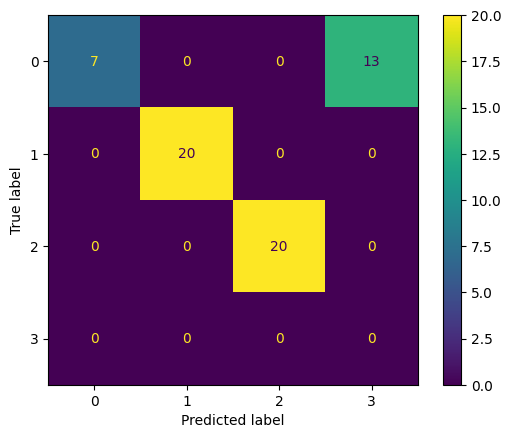

In [31]:
# Your code:
# Perform K-means clustering with K=4
kmeans = KMeans(n_clusters=4, random_state=41)
predicted_labels = kmeans.fit_predict(X)

# Compare K-means clusters to true class labels
accuracy = accuracy_score(y, predicted_labels)

print("Accuracy:", accuracy)
ConfusionMatrixDisplay.from_predictions(y, predicted_labels)

##<font color="red">**Question 2**</font>

For a real world example, we will use **Bank Marketing Data Set dataset**. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.

**Columns**
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Social and economic context attributes**
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)
21. subscribed : has the client subscribed a term deposit? (binary: 'yes','no')


In [32]:
# Load Libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder

# Load Dataset
path = "/content/bank_marketing_dataset.csv"
df = pd.read_csv(path)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [34]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Fortunately, we don't have any missing values:

In [35]:
# find missing values for each column
missing_values = df.isnull()
missing_values.sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

####Exploratory Data Analysis - Preprocessing

- let's try to undertand age distribution of customers.

According to the plot, most of the customers are in the age range of 30 to 40. There are small number of customers over 60:

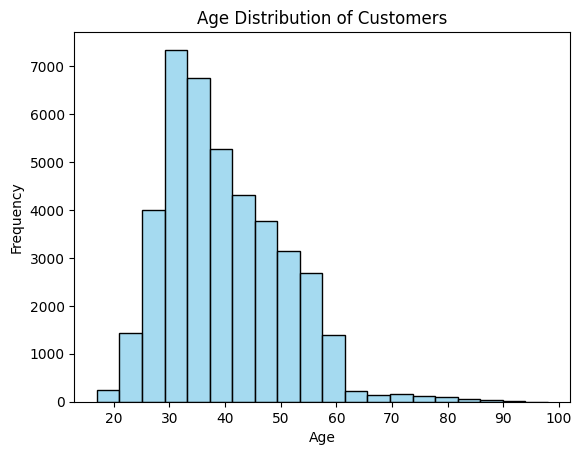

In [36]:
# Your code:
plt.figure()
sns.histplot(df['age'], bins=20, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

-  see if there is between ages and loan status of customers.

The barplot indicates that the average age for all of three loan status categories are nearly the same:

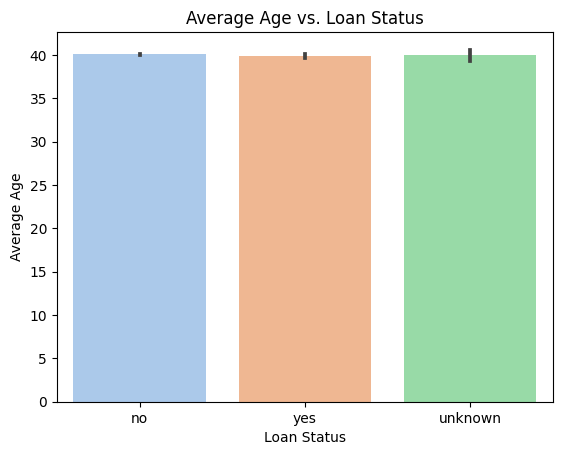

In [37]:
# Your code:
plt.figure()
sns.barplot(x='loan', y='age', data=df, palette='pastel')
plt.title('Average Age vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Age')
plt.show()

In the boxplot, we see that the median of all of three categories of loan status is approximately near 40. We have some outliers in "yes" and "no" categories; if we

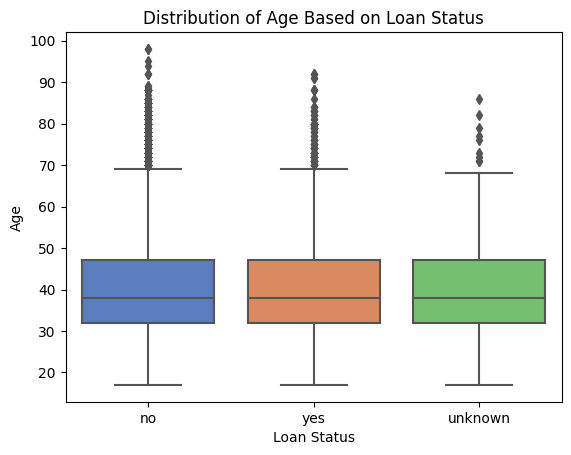

In [38]:
# Your code:
plt.figure()
sns.boxplot(x='loan', y='age', data=df, palette='muted')
plt.title('Distribution of Age Based on Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Age')
plt.show()

- try to undertand marital status distribution of customers.

A great group of customers belong to "married" status; the second one is "single" and the third one is "divorced". In most cases, families apply for a loan and we see that in our data because most of customers are "married":

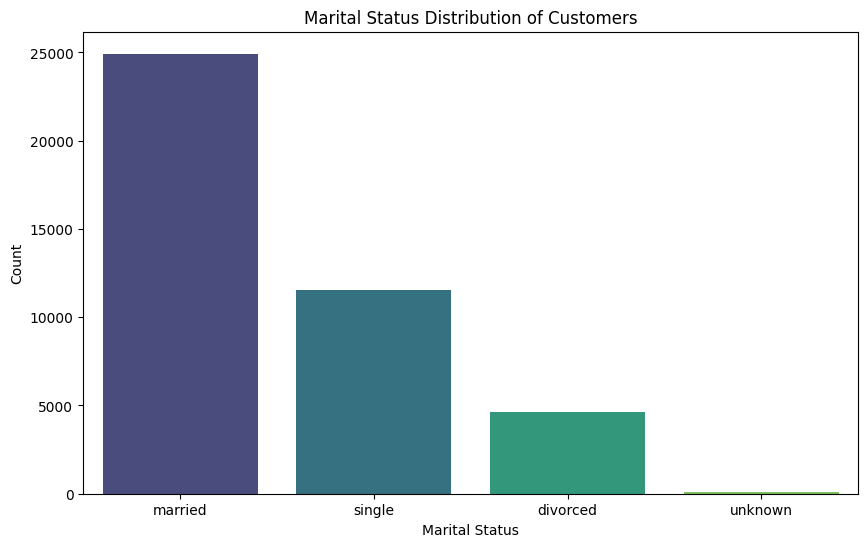

In [39]:
# Your code:
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', data=df, palette='viridis')
plt.title('Marital Status Distribution of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

- pdays column means number of days that passed by after the client was last contacted from a previous campaign. 999 means client was not previously contacted. look at that.

Overall, we 41188 records in the dataset but when we look at **pdays** column we see that more than %95 of clients was not previously contacted. This column is not a suiatble feature and we should change it:

In [40]:
# Your code:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

We substitute this column with another column: **"lastly_contacted"**.

This column will inform us that if we recently had a contact with customer or not:

In [41]:
df['lastly_contacted'] = df['pdays'].apply(lambda x: 1 if x < 999 else 0)
df = df.drop("pdays", axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,lastly_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


- look distribution of durations based on contact type

The average duration of cellular calls is higher than telephone calls:

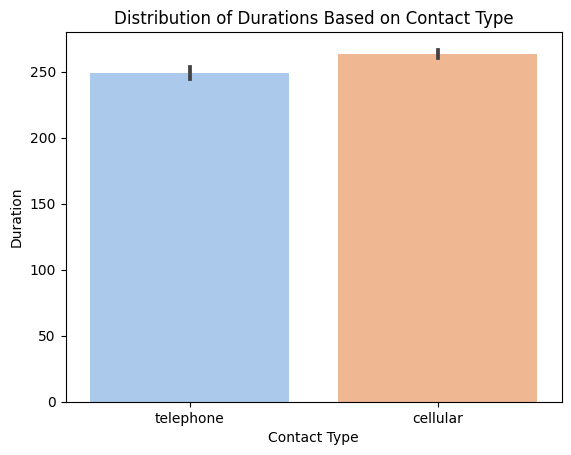

In [42]:
plt.figure()
sns.barplot(x='contact', y='duration', data=df, palette='pastel')
plt.title('Distribution of Durations Based on Contact Type')
plt.xlabel('Contact Type')
plt.ylabel('Duration')
plt.show()

Like average, the median of cellular is higher than telephone. We have some extreme outliers in telephone category, nearly 5000 minutes of call!"

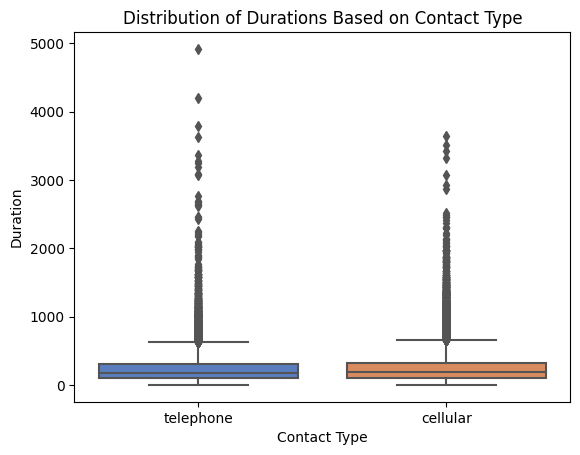

In [43]:
# Your code:
plt.figure()
sns.boxplot(x='contact', y='duration', data=df, palette='muted')
plt.title('Distribution of Durations Based on Contact Type')
plt.xlabel('Contact Type')
plt.ylabel('Duration')
plt.show()

- look loan status of customers.

Most of the loan applications are rejected, a small group has accepted and a smaller group are waiting to know their loan status:

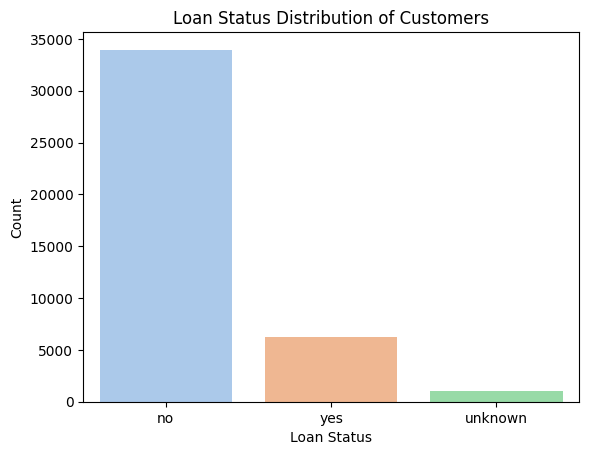

In [44]:
# Your code:
plt.figure()
sns.countplot(x='loan', data=df, palette='pastel')
plt.title('Loan Status Distribution of Customers')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

- look jobs, education customers

Top 3 jobs among costumers are:


*   admin
*   blue-collar
* technician



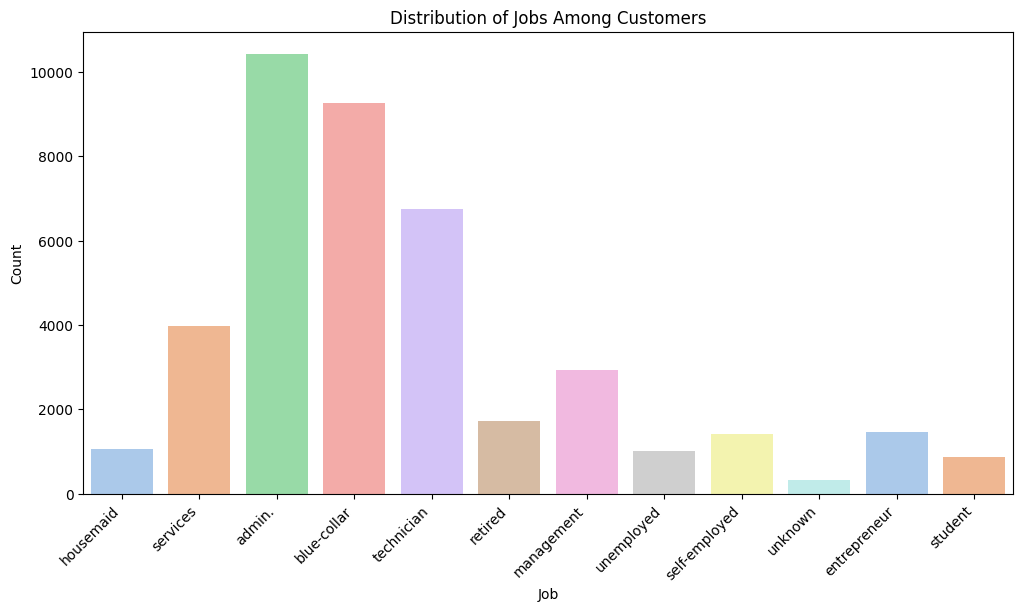

In [45]:
# Your code:
# Plot the distribution of jobs
plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=df, palette='pastel')
plt.title('Distribution of Jobs Among Customers')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Most of the customers have a university or highschool degree:

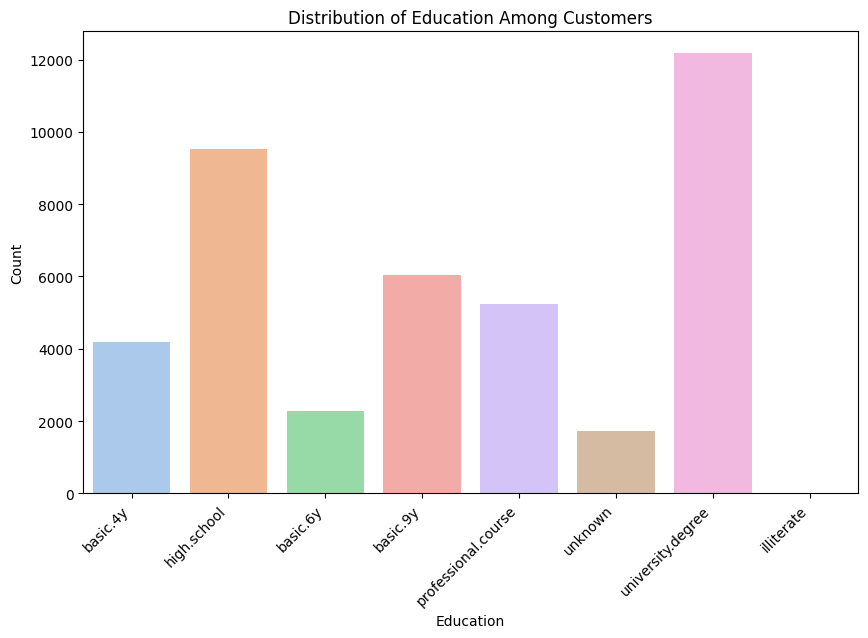

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df, palette='pastel')
plt.title('Distribution of Education Among Customers')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

- In order to calculate distances for K-Means clustering, all features must be in numeric format. solve this issue and then apply scaling

At first, let's have a list of categorical and numerical columns:

In [47]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

Let's encode categorical columns:

In [48]:
# Your code:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

Now, we apply scaling on numerical columns:

In [49]:
# Apply feature scaling (StandardScaler)
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

Now, the dataset is ready!:

In [50]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,lastly_contacted
0,1.533034,3,1,0,0,0,0,1,6,1,...,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0,-0.195415
1,1.628993,7,1,3,1,0,0,1,6,1,...,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0,-0.195415
2,-0.290186,7,1,3,0,2,0,1,6,1,...,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0,-0.195415
3,-0.002309,0,1,1,0,0,0,1,6,1,...,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0,-0.195415
4,1.533034,7,1,3,0,0,2,1,6,1,...,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0,-0.195415


Use kmeans and fit the model

At this step, we don't know that which number is suitable for clusters, so we just start with 3 clusters:

In [51]:
# Your code:
# Specify the number of clusters (K)
num_clusters = 3

# Create K-Means model
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the scaled data
kmeans_model.fit(df)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans_model.labels_

# Add the cluster labels to the original dataframe for further analysis
data_with_clusters = df.copy()
data_with_clusters['Cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- correlations of each feature with clusters that you assigned.

In [52]:
# Your code:
# Concatenate the scaled features and cluster labels into a single DataFrame
cluster_data = pd.concat([df, data_with_clusters['Cluster']], axis=1)

# Calculate the correlation matrix
correlation_matrix = cluster_data.corr()

# Extract correlations of features with the 'Cluster' column
cluster_correlations = correlation_matrix['Cluster']

# Print correlations
print("Correlations with Cluster:")
print(cluster_correlations)

Correlations with Cluster:
age                -0.051713
job                 0.093059
marital             0.064998
education           0.795496
default            -0.134364
housing             0.011112
loan                0.008453
contact            -0.095406
month              -0.078843
day_of_week        -0.008785
duration           -0.010569
campaign            0.001714
previous            0.031578
poutcome            0.022882
emp.var.rate       -0.035203
cons.price.idx     -0.075738
cons.conf.idx       0.081287
euribor3m          -0.025821
nr.employed        -0.029949
subscribed          0.053813
lastly_contacted    0.044170
Cluster             1.000000
Name: Cluster, dtype: float64


In comparison with other features, "education" is highly correlated to cluster:

<Axes: >

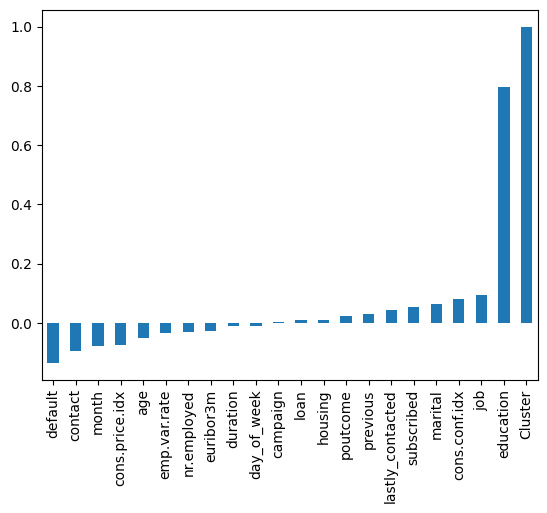

In [53]:
plt.figure()
cluster_correlations.sort_values().plot(kind='bar')

- How to find optimal number of clusters (K)?

<font color="green">**Answer:**</font>

There are two methods to detect the optimal number for clusters:


*   elbow method
*   Silhouette Score



## Elbow Method
 In this method, we plot the inertia as a function of 𝑘, the curve often contains an inflexion point called the elbow. Inertia is the  sum  of  the  squared  distances  between  the instances and their closest centroids. This inflexion point shows us the optimal number of clusters. In our case, $k=2$ seems the optimal number we expect:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

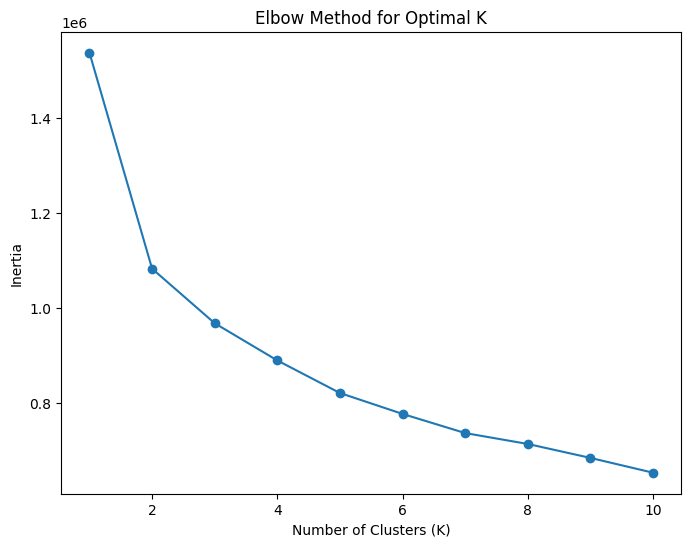

In [54]:
# Your code:
distortions = []
K_range = range(1, 11)

for k in K_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(df)
    distortions.append(kmeans_model.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


## Silhouette Score

Silhouette score is the mean silhouette coefficient over all the instances. An instance’s silhouette coefficient is equal to:

$\frac{b-a}{max(a,b)}$


*   𝑎 is the mean distance to the other instances in the same cluster (the mean intra-cluster distance).
*   𝑏 is the mean nearest-cluster distance.
*   The silhouette coefficient can vary between –1 and +1.

The silhoutte score closer to 1 will indicate us a better kmeans, so we will choose the model with this condition. In this scenarion, $k=2$ depicts a higher silhouette score so it's the optimal number of k:



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

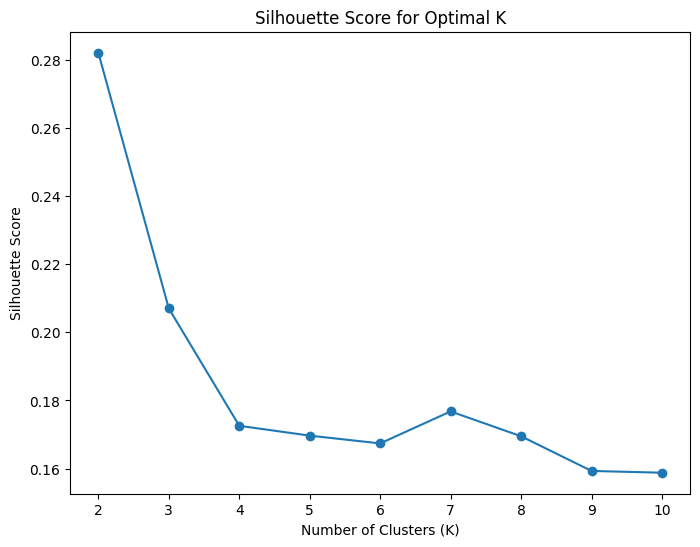

In [55]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    labels = kmeans_model.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

## DBSCAN (Density-based spatial clustering)

**DBSCAN**, which stands for Density-Based Spatial Clustering of Applications with Noise, is a clustering algorithm used in machine learning and data mining. Unlike k-means, DBSCAN does not require the user to specify the number of clusters beforehand and can identify clusters of arbitrary shapes. It is particularly effective in discovering clusters in data with varying densities.

Here are the main concepts associated with DBSCAN:

**Core Points:**
A data point is considered a core point if there are at least a specified number of data points (minPts) within a certain radius (eps) around it, including itself.

**Border Points:** A data point is a border point if it is within the specified radius of a core point but does not have enough neighbors to be considered a core point itself.

**Noise:** Data points that are neither core points nor border points are considered noise. They do not belong to any cluster.

The DBSCAN algorithm works as follows:

1. **Select a Random Unvisited Data Point:**
Choose a data point that has not been visited.
2. **Expand Cluster:**
If the chosen point is a core point, create a new cluster and expand it by adding all reachable core points (and their neighbors) to the cluster.
3. **Repeat:**
Continue the process until all points have been visited.
The result is a set of clusters, each containing core points that are densely connected. Border points may be part of a cluster but are not as tightly connected as core points. Noise points are not assigned to any cluster.

The DBSCAN algorithm uses two parameters:

**eps (ε):** A distance measure that will be used to locate the points in the neighborhood of any point. For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance’s ε-neighborhood.

**minPts:** The minimum number of points (a threshold) clustered together for a region to be considered dense. If an instance has at least min_samples instances in its ε-neighborhood (including itself), then it is considered a core instance. In other words, core instances are those that are located in dense regions. All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.

Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

To check out more, please visit [this](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/) online visualisation tool.

##<font color="red">**Question 3**</font>
For a real world example, we will use **Wholesale customers dataset**. The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. It can be downloaded from [here](https://archive.ics.uci.edu/dataset/292/wholesale+customers).


Attribute Information:

1. **FRESH:** annual spending (m.u.) on fresh products (Continuous);
2. **MILK:** annual spending (m.u.) on milk products (Continuous);
3. **GROCERY:** annual spending (m.u.)on grocery products (Continuous);
4. **FROZEN:** annual spending (m.u.)on frozen products (Continuous)
5. **DETERGENTS_PAPER:** annual spending (m.u.) on detergents and paper products (Continuous)
6. **DELICATESSEN:** annual spending (m.u.)on and delicatessen products (Continuous);
7. **CHANNEL:** customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8. **REGION:** customers  Region Lisnon, Oporto or Other (Nominal)


- Do exploratory data analysis and preprocessing

- Showing the relation between *MILK* and *GROCERY* spending

- create an annotated clustermap of the correlations between spending on different categories

In [56]:
# Your code:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = "/content/Wholesale customers data.csv"
df = pd.read_csv(path)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Fortunately, we don't have null values:

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [58]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


This plot shows that there is a positive relationship between milk spending and grocery spending. However, the relationship is not perfect and there are some other factors that may also be influencing grocery spending:

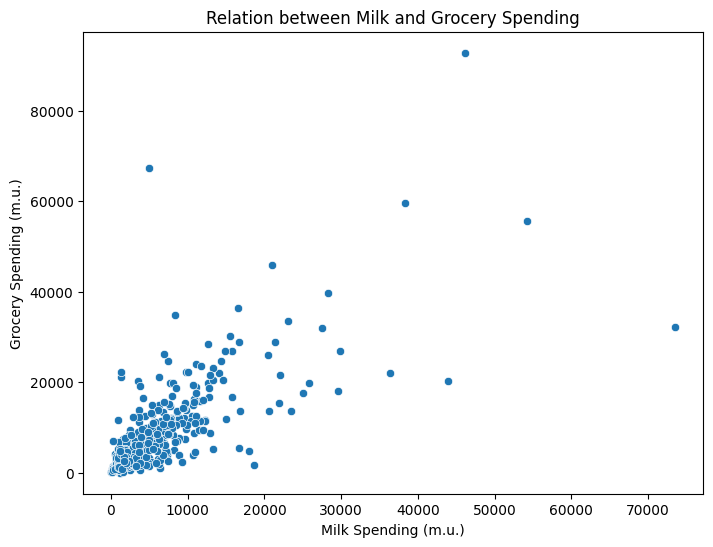

In [59]:
# Visualize the relation between MILK and GROCERY spending
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Milk', y='Grocery', data=df)
plt.title('Relation between Milk and Grocery Spending')
plt.xlabel('Milk Spending (m.u.)')
plt.ylabel('Grocery Spending (m.u.)')
plt.show()

At first, let's find out that what is really a clustermap. A clustermap is a type of heatmap that displays hierarchical clustering. Hierarchical clustering is a method of grouping data based on similarity. In a clustermap, the rows and columns are sorted based on their similarity to each other, so that similar rows and columns are next to each other.

The plot shows that the spending of the following categories are highly correlated:

*   Milk and grocery / Milk and detergents_paper
*   Grocery and detergents_paper
*   Milk, grocery and detergents_paper with (Fresh, Frozen)

The first two items in the list has high positive correlation coefficients. If  you purchase more one of them, The purchase of others will go up.

We have the opposite case about the Fresh and Frozen categories. They have a negative relation with Milk, grocery and detergents paper. Buying an item from one group will decrease the chance of buying from other group:

<Figure size 1000x800 with 0 Axes>

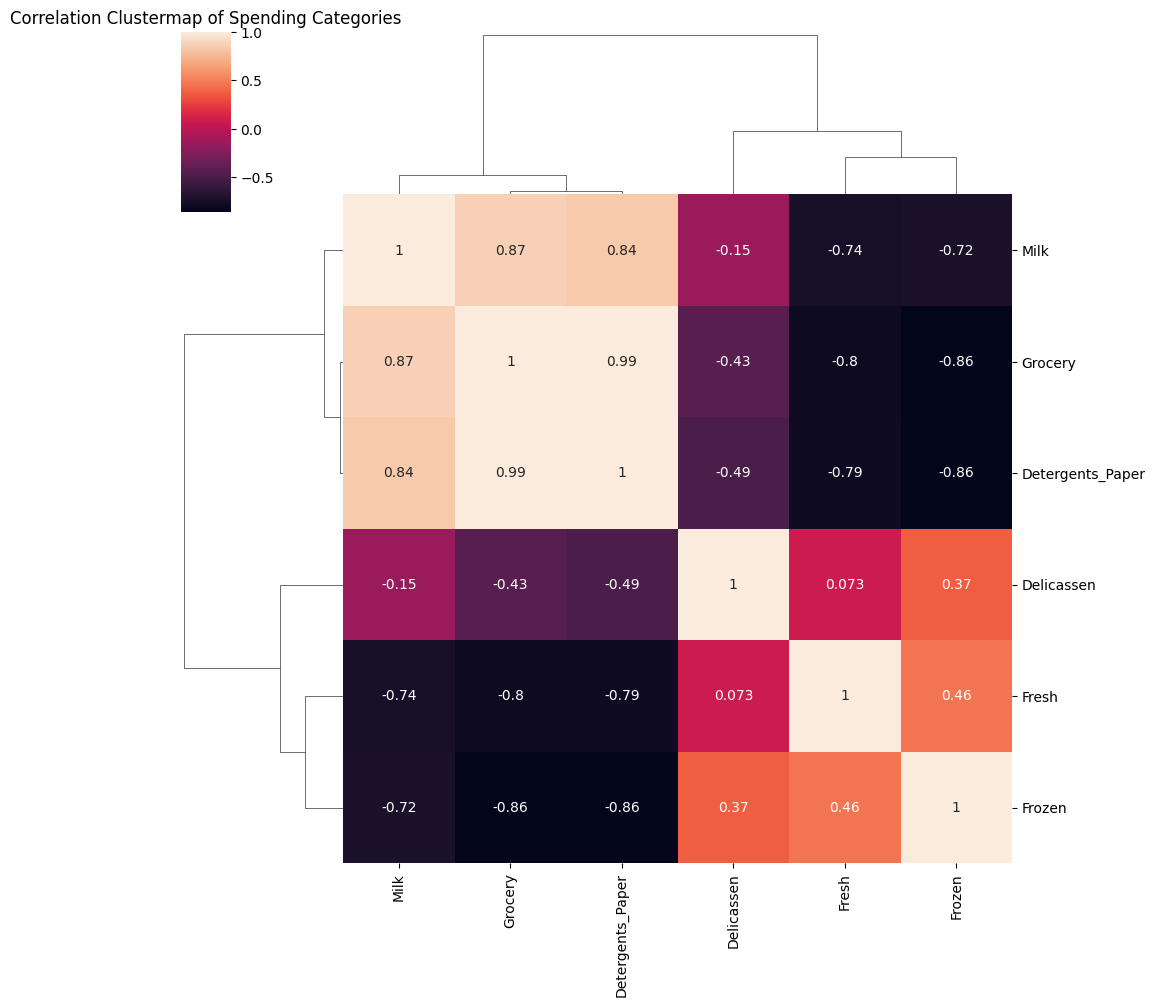

In [60]:
# Create an annotated clustermap of the correlations between spending categories
spending_corr = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].corr()

plt.figure(figsize=(10, 8))
sns.clustermap(spending_corr.corr(),annot=True)
plt.title('Correlation Clustermap of Spending Categories')
plt.show()


- Create a variety of models testing different epsilon values.

Before testing different models, we should scale our features:

In [61]:
# Your code:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Now we will examine a diverse set of DBSCAN models with a range of epsilon values. The model with less outliers is a better choice:

In [62]:
import numpy as np
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.001,3,50):

    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(df_scaled)

    # percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    outlier_percent.append(perc_outliers)

Now we visualize results to find out that with epsilon value is more suitable. With increasing value of epsilon, we will have less outliers but at some point we see that the rate of improvement is too low. This point indicates a optimal value for epsilon. Here $epsilon=2$ is the optimal choice:

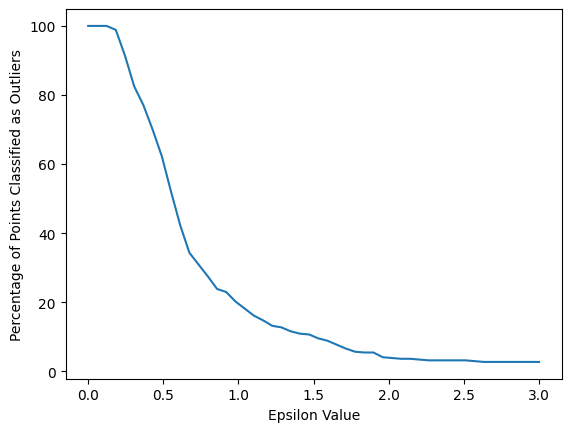

In [63]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.show()

- Based on the plot that you had from the last part, retrain a DBSCAN model with a reasonable epsilon value

In [64]:
# Your code:
dbscan = DBSCAN(eps=2)
dbscan.fit(df_scaled)

DBSCAN(eps=2)

In [65]:
df['labels'] = dbscan.labels_
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


## Image segmentation


Image segmentation is a computer vision task that involves dividing an image into meaningful and semantically coherent regions or segments. The goal is to partition an image into regions that share similar visual characteristics, such as color, texture, intensity, or other features. Each segment typically represents a distinct object or region of interest within the image.

##<font color="red">**Question 4**</font>
In this question, you are supposed to segmente an image using KMeans clustering.


In [66]:
#Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
#load_sample_image dataset from scikit learn consists of numpy array of a single sample image

#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

- Load a sample flower image from load_sample_image scikit learn dataset and show the image


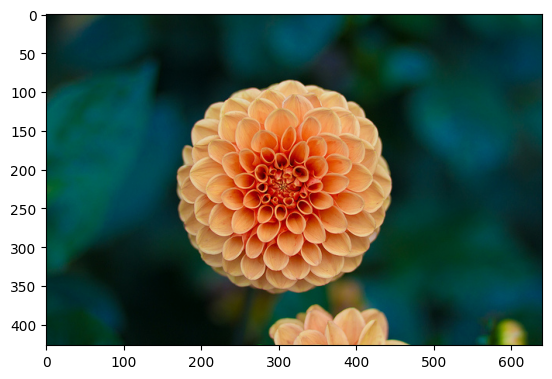

In [67]:
flower = load_sample_image("flower.jpg")
# Your code:
plt.imshow(flower)

- Get shape, scale, reshape

In [68]:
# Your code:
print("Image shape: ", flower.shape)

Image shape:  (427, 640, 3)


Before applying segmentation using kmeans, we should scale pixel values:

In [69]:
flower = flower/255.

Just one step before kmeans, we reshape 3D image to 2D array:

In [70]:
# Reshape the image to a 2D array (rows x columns, RGB values)
image_2d = flower.reshape((-1, 3))

- Use KMeans clustering and get the different colored images


We segment image with 8 colors in here:

In [71]:
# Your code:
# Use KMeans clustering
num_clusters = 8
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans_model.fit_predict(image_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In the following, you can see both original and segmented images. If we look at image in details especially in flower, we observe segmented parts well:

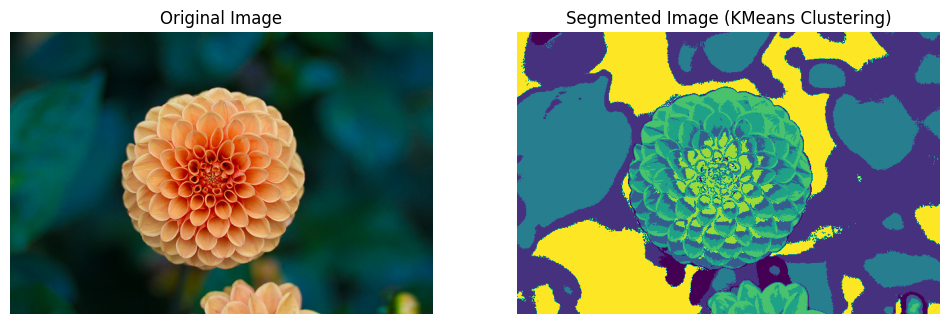

In [72]:
# Reshape the cluster labels back to the original image shape
segmented_image = cluster_labels.reshape(flower.shape[:2])

# Display the original and segmented images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(flower)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='viridis')
plt.title("Segmented Image (KMeans Clustering)")
plt.axis("off")

plt.show()

## Gaussian Mixture Model

**Gaussian Mixture Model** (GMM) is a probabilistic model that represents a mixture of multiple Gaussian (normal) distributions. Each component Gaussian distribution in the mixture represents a cluster or a subpopulation within the overall dataset. GMMs are commonly used for modeling complex probability distributions and are frequently applied in the field of machine learning, particularly in unsupervised learning tasks such as clustering and density estimation.

##<font color="red">**Question 5**</font>
To deal with GMM, we will use **CC GENERAL** dataset.

Following is the Data Dictionary for Credit Card dataset :

- **CUST_ID** : Identification of Credit Card holder (Categorical)
- **BALANCE** : Balance amount left in their account to make purchases
- **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- **PURCHASES** : Amount of purchases made from account
- **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go
- **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment
- **CASH_ADVANCE** : Cash in advance given by the user
- **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
- **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"
- **PURCHASES_TRX** : Numbe of purchase transactions made
- **CREDIT_LIMIT** : Limit of Credit Card for user
- **PAYMENTS** : Amount of Payment done by user
- **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
- **PRCFULLPAYMENT** : Percent of full payment paid by user
- **TENURE** : Tenure of credit card service for user


In [73]:
# libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

- Load dataset

In [74]:
# Your code:
path = "/content/CC GENERAL 2.csv"
df = pd.read_csv(path)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [76]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


We have missing values in two columns: **"CREDIT_LIMIT"** and **"MINIMUM_PAYMENTS"**:

In [77]:
# find missing values for each column
missing_values = df.isnull()
missing_values.sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**"CUST_ID"** is not a useful column so we drop it:

In [78]:
df.drop(columns=["CUST_ID"], inplace=True)

**"CREDIT_LIMIT"** has just one record with null value so it's better to just drop this row:

In [79]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

For **"MINIMUM_PAYMENTS"** column, we fill null values with median of the column:

In [80]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

- Standardize data, Normalize and Reduce the dimensions of the data

In [81]:
# Your code:
from sklearn.preprocessing import StandardScaler, normalize

# Scaling and normalizing data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
normalized_data = normalize(scaled_data)
normal_df = pd.DataFrame(normalized_data)

For dimensionality reduction, we used PCA and specified number of components as 3:

In [82]:
# Reducing data dimension with PCA
pca = PCA(n_components = 3, random_state=42)
data_reduced = pca.fit_transform(normal_df)
data_reduced = pd.DataFrame(data_reduced)

- Use Gaussian Mixture Model

In [83]:
# Your code:
components = 3
GMM = GaussianMixture(n_components = components, random_state=42)
pred = GMM.fit_predict(data_reduced)

- Visualize the clustering and analyse

In the following plot, the principal components of data together with their assigned cluster have depicted. A great number of points belong to purple cluster and other points are in green and yellow clusters. But points in yellow cluster are sparser than green cluster:

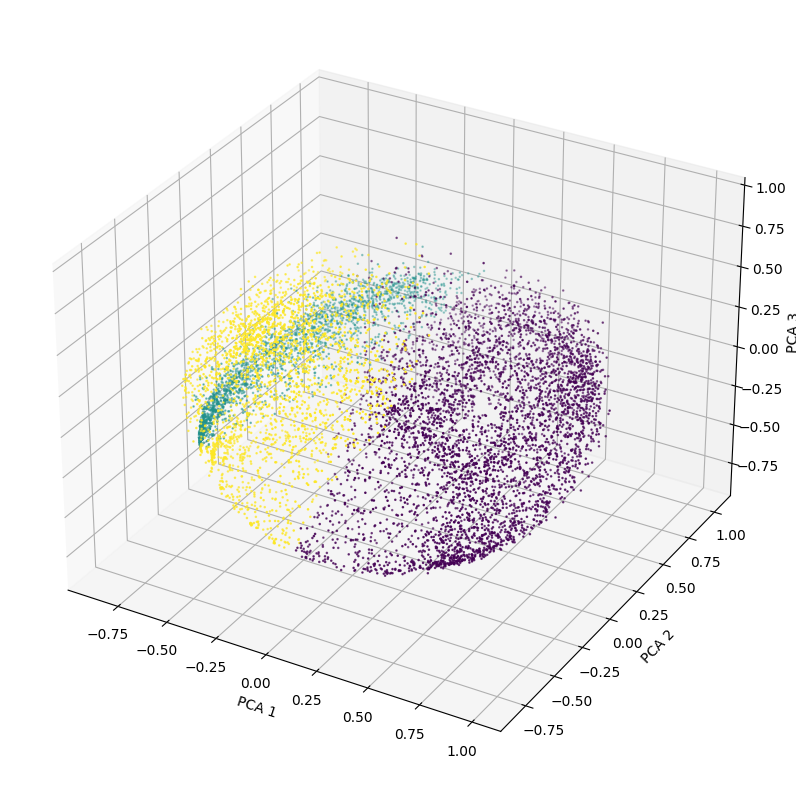

In [84]:
# Your code:
fig = plt.figure(figsize = (10, 10))

x = data_reduced[0]
y = data_reduced[1]
z  = data_reduced[2]

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = pred, s=0.7)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

plt.show()